<a href="https://colab.research.google.com/github/limdiny/ML/blob/main/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 회귀
* 선형 회귀

특성과 타깃 사이의 관계를 가장 잘 나타내는 선형방정식을 찾는다.

특성이 한개면 직선 방정식이 된다.

특성과 타킷 사이의 관계는 선형방정식의 계수 또는 가중치에 저장된다.

+ 모델 파라미터

머신러닝 모델이 특성에서 학습한 파라미터를 말한다.

* 다항 회귀

다항식을 사용해 특성과 타깃 사이의 관계를 나타낸다. 비선형일수도 있지만 선형회귀로도 표현한다. 

* LinearRegression

사이킷런의 선형 회귀 클래스이다.

fit_intercept=False로 지정하면 절편은 학습하지 않는다.

coef를 출력한 결과값은 특성의 개수와도 같다.

intercept 에는 절편이 포함되어있다.

In [ ]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )
# 훈력/테스트 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
# 입력데이터 reshape
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
#k-최근접 이웃 회귀모델 훈련
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)


KNeighborsRegressor(n_neighbors=3)

In [ ]:
# 농어 50cm의 무게 예측
print(knr.predict([[50]]))

[1033.33333333]


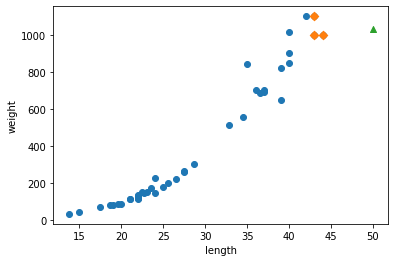

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_input,train_target)
#50cm 농어의 이웃 3마리를 구한다.
distance,indexs=knr.kneighbors([[50]])
plt.scatter(train_input[indexs],train_target[indexs],marker='D')
#50cm 농어의 위치
plt.scatter(50,1033,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

n_neighbors=3으로 지정해줬고,

50cm 농어 근처에 있는 3마리를 D로 마커, 50cm 농어에는 ^로 마커

여기서k최근접 이웃 알고리즘 모델의 문제점이 생김!! 

이웃 샘플로만 평균을 구해서 예측값을 구함

In [ ]:
# k-최근접 이웃 회귀 모델의 한계 >> 선형회귀를 배워보자
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
# 선형회귀모델 훈련
lr.fit(train_input,train_target)
print(lr.predict([[50]]))

[1241.83860323]


k최근접이웃회귀모델보다 선형회귀를 쓰니 더 그럴싸한 예측값이 나왔다.

In [ ]:
print(lr.coef_,lr.intercept_)

[39.01714496] -709.0186449535477


coef(기울기)와 intecept(절편)는 머신러닝 알고리즘이 찾은 값으로 모델 파라미터라고 부른다.

선형회귀는 모델 기반 학습, k최근접 이웃 모델은 사례 기반 학습

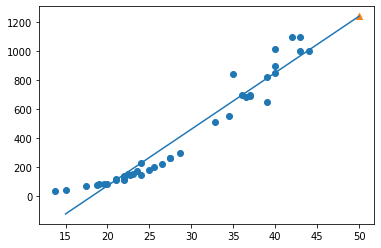

In [ ]:
plt.scatter(train_input,train_target)

plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])
plt.scatter(50,1241.8,marker='^')
plt.xlabel='length'
plt.ylabel='weight'
plt.show()

y = 39.01714496  x - -709.0186449535477

x=[15,50] 

In [ ]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.939846333997604
0.8247503123313558


둘다 성능 별로 안좋은 과소적합으로 볼 수 있음

In [ ]:
# 선형회귀를 보자니 농어의 값이 음수가 나올수도있다 >> 2차 방정식처럼 곡선을 그려주는 다항 회귀를 배워보자(이것또한 선형회귀로 볼 수 있음)
train_poly=np.column_stack((train_input**2,train_input))
test_poly=np.column_stack((test_input**2,test_input))

print(train_poly.shape,test_poly.shape)

(42, 2) (14, 2)


길이를 제곱해서 특성을 추가한다.

 column_stack() 함수를 사용하면 배열을 나란히 붙일 수 있다.

 

In [ ]:
lr=LinearRegression()
lr.fit(train_poly,train_target)

print(lr.predict([[50**2,50]]))
print(lr.coef_,lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.05021078278276


predict를 할때 길이만 넣어주는게 아니라, 길이 제곱의 특성도 추가 되었기때문에 넣어줘야함

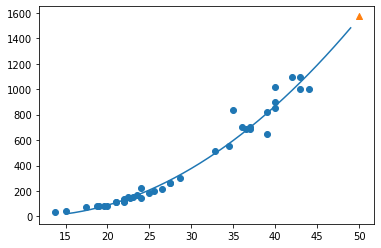

In [ ]:
plt.scatter(train_input,train_target)
point=np.arange(15,50)
plt.plot(point,1.01*point**2+-21.6*point+116.05)

plt.scatter([50],[1574],marker='^')
plt.xlabel='length'
plt.ylabel='weight'
plt.show()

In [ ]:
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9706807451768623
0.9775935108325121


성능은 좋아진듯하나

 테스트 성능이 더 좋은 여전히 과소적합임